##                                   **CASE STUDY-3**

### **TEAM NAME:BackBenchers**

## **MEMBERS**

*   **RISHABH GUPTA(TEAM LEADER)**
> 18BCS6223
*   **YASH PANT**
> 18BCS6087
*   **SHREY NAGPAL**
> 18BCS6079
*   **ROHAN ARORA**
> 18BSC6102





In [2]:
import pandas as pd
import seaborn as sns

## importing dataset using pandas
dataset = pd.read_csv('/content/CarPrice.csv')

## printing first 5 rows of dataset
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
## checking if any value in a particular row is empty
dataset.isna().any()

## false denote no empty columns 

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

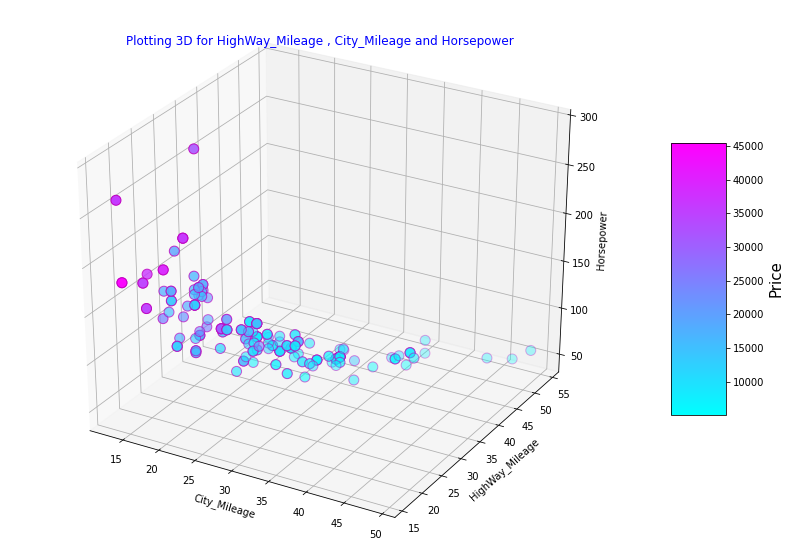

In [4]:
## importing matplot library for ploting graphs along with Axes 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## setting plot size
fig = plt.figure(figsize=(14,10))

## getting 3d projection
ax  = fig.gca(projection = "3d")

## using scatter plot for ploting highway mileage, city mileage, horsepower and comparing it with price 
## cmap is set to cool for better visualization 
plot =  ax.scatter(dataset["citympg"],
           dataset["highwaympg"],
           dataset["horsepower"],
           linewidth=1,edgecolor ="m",
           c=dataset["price"],s=100,cmap="cool")

## labeling the plot
ax.set_xlabel("City_Mileage")
ax.set_ylabel("HighWay_Mileage")
ax.set_zlabel("Horsepower")

## setting the color bar according to values in price column by printing them in bar chart
lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Price",fontsize = 15)

## visualizing plot
plt.title("Plotting 3D for HighWay_Mileage , City_Mileage and Horsepower",color="blue")
plt.show()


## With this plot we can see that car with Highway mileage ranging between 35 to 45, 
## City mileage ranging between 14.5 to 30, have price range between 45000 to 20000.

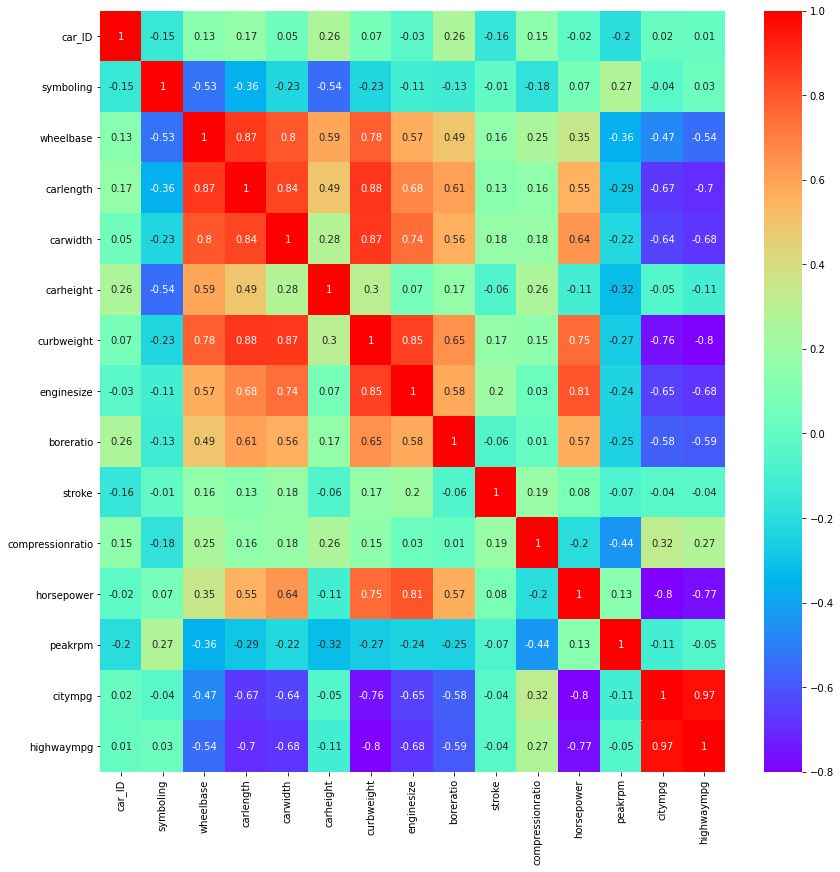

In [5]:
from pandas.plotting import scatter_matrix

Y=dataset.price #Target Variable 
X=dataset.drop(['price'],axis=1) #Input data
#displot - Heat map and correlation matrix

# Visualizing the data with seaborn heat map
correlation_matrix = X.corr().round(2)
plt.figure(figsize=(14,14))
sns.heatmap(data=correlation_matrix, annot=True,cmap = 'rainbow')

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

features=["carlength","carwidth","carheight","curbweight","enginesize",
               "horsepower","peakrpm","highwaympg","price"]

## taking target column and typr casting it into integer
y = dataset["horsepower"].astype(int)

## taking rest of the columns
X=dataset[features]

## Creating test and train variables, here train data and test data is splitted in 80-20 ratio
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)  

# fitting model on training data using Linear Regression, will give less accuracy
logmodel=LogisticRegression()
model = logmodel.fit(X_train, y_train)

## making predictions about test data
y_pred = logmodel.predict(X_test)
print("Predicted Data=",y_pred)

score1=accuracy_score(y_pred,y_test)
print("Accuracy Score=",score1)

new_score=r2_score(y_pred,y_test)
print("R2_score",new_score)

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix=",cm[0:5])  


print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

## classification report will give us the precison, recall and f1 score
print(classification_report(y_test,y_pred))



Predicted Data= [ 68  68  68 101  70 123  68 112  68 116 110 160 110  68 114  97 102  68
 110  97 116 112 110  68 116  68 114  82  68  68  70 116 184 116  95  82
  68 123 101 140  62]
Accuracy Score= 0.14634146341463414
R2_score 0.16769201496797104
Confusion Matrix= [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
x train:  (164, 9)
x test:  (41, 9)
y train:  (164,)
y test:  (41,)
              precision    recall  f1-score   support

          48       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         2
          62       0.00      0.00      0.00         2
          68       0.17      1.00      0.29         2
          69       0.00      0.00      0.00         3
          70  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in

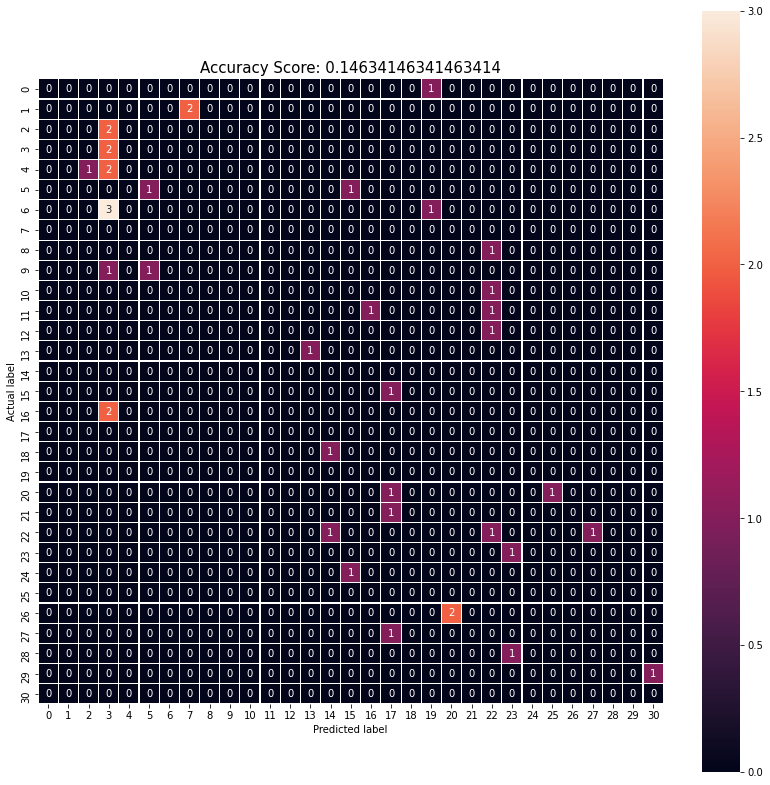

In [7]:
## printing the above confusion matrix and checking it with the predicted data value 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
## using heatmap for prediction
sns.heatmap(data=cm, annot=True, linewidths=.1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
## setting up label and other things
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);

In [8]:
# implementing naive bias classifier

from sklearn.naive_bayes import MultinomialNB 

features=["carlength","carwidth","carheight","curbweight","enginesize",
               "horsepower","peakrpm","highwaympg","price"]


## taking target column and typr casting it into integer
y = dataset["price"].astype(int)

## taking rest of the column
X=dataset[features]

## splitting dataset into 80% train data and 20% test data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)  

#Train the model on the training data 
model = MultinomialNB().fit(X_train, y_train)  

#Test the model on the testing data and comparing the result with the actual target.
y_pred = model.predict(X_test) 
accuracy_Score=r2_score(y_test,y_pred)

## checking the predicted data values and accuracy score 
## predicted data will prevent us overfitting and underfitting
print("Predicted Data=",y_pred)
print("Accuracy Score=",accuracy_Score)

## printing confusion matrix
cm1=confusion_matrix(y_test, y_pred)
## A confusion matrix is a summary of prediction results on a classification problem. 
## The number of correct and incorrect predictions are summarized with count values and broken down by each class. 
## This is the key to the confusion matrix. 
## The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
print("Confusion Matrix=",cm1[0:5])  

## printing shapes and getting sizes
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

print(classification_report(y_test,y_pred))


Predicted Data= [ 6692  7799  6695  8916  9995 24565  7799  5399  6695 10595 17710 18950
 15985  7799 12764 11549  9995  6189 18620 12170  9639  7295 16430  7957
  9639  7295 14869  7898  6229  7295  8238  8921 36880  8921 16900  7898
  8195 28176 13950 23875  5348]
Accuracy Score= 0.9777820449568548
Confusion Matrix= [[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


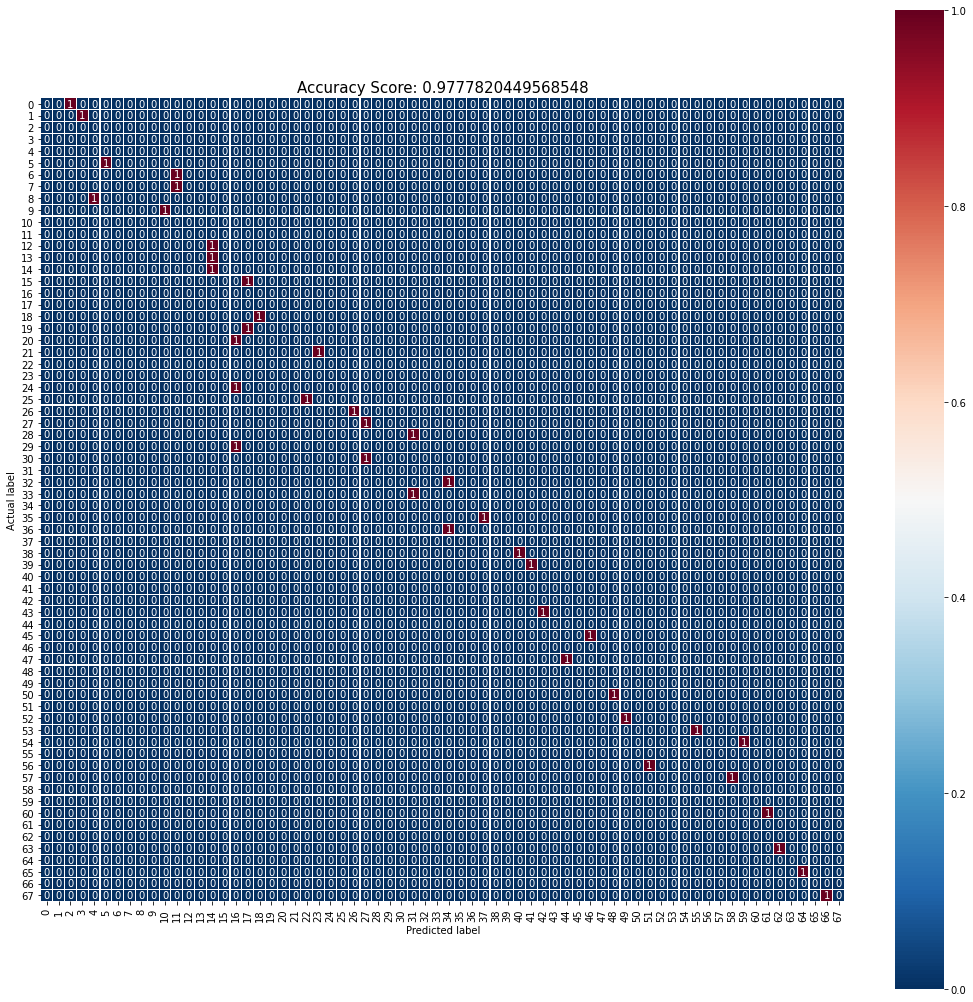

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18))
sns.heatmap(data=cm1, annot=True, linewidths=.1, square = True,cmap = 'RdBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_Score)
plt.title(all_sample_title, size = 15);